# El equipo local ganará?

In [462]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [463]:
# Set the theme, including the palette
sns.set_theme(style="whitegrid", palette="deep")

# Leer data

In [464]:
df = pd.read_csv('../data/Liga_1_Matches_2014-2024.csv')
df.shape

(7206, 19)

# Explorando Data

In [465]:
df.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Match Report,Notes,Team
0,2014-06-07,18:00,Descentralizado,Torneo Apertura,Sat,Home,W,2,1,San Simón,NaN,"1,877",NaN,NaN,NaN,Fernando Legario,Match Report,NaN,Juan Aurich
1,2014-06-14,16:00,Descentralizado,Torneo Apertura,Sat,Away,L,0,2,U César Vallejo,NaN,"1,375",NaN,NaN,NaN,Luis Garay Evia,Match Report,NaN,Juan Aurich
2,2014-06-21,15:45,Descentralizado,Torneo Apertura,Sat,Home,W,2,1,León Huánuco,NaN,"1,683",NaN,NaN,NaN,Diego Haro,Match Report,NaN,Juan Aurich
3,2014-06-29,16:00,Descentralizado,Torneo Apertura,Sun,Away,D,0,0,Alianza Lima,NaN,"6,119",NaN,NaN,NaN,Luis Garay Evia,Match Report,NaN,Juan Aurich
4,2014-07-05,17:30,Descentralizado,Torneo Apertura,Sat,Home,W,6,0,Sport Huancayo,NaN,"1,366",NaN,NaN,NaN,Miguel Santiváñez,Match Report,NaN,Juan Aurich


In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7206 entries, 0 to 7205
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7206 non-null   object 
 1   Time           7198 non-null   object 
 2   Comp           7206 non-null   object 
 3   Round          7206 non-null   object 
 4   Day            7206 non-null   object 
 5   Venue          7206 non-null   object 
 6   Result         7206 non-null   object 
 7   GF             7206 non-null   object 
 8   GA             7206 non-null   object 
 9   Opponent       7206 non-null   object 
 10  Poss           269 non-null    float64
 11  Attendance     3324 non-null   object 
 12  Captain        5550 non-null   object 
 13  Formation      5331 non-null   object 
 14  Opp Formation  5331 non-null   object 
 15  Referee        6688 non-null   object 
 16  Match Report   7206 non-null   object 
 17  Notes          280 non-null    object 
 18  Team    

In [467]:
df.describe(include='all')

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Match Report,Notes,Team
count,7206,7198,7206,7206,7206,7206,7206,7206,7206,7206,269.000000,3324,5550,5331,5331,6688,7206,280,7206
unique,1615,56,4,22,7,3,3,20,22,141,NaN,1447,332,22,20,169,1,69,35
top,2019-11-24,15:30,Liga 1,Torneo Apertura,Sun,Home,L,1,1,Sporting Cristal,NaN,100,Bernardo Cuesta,4-2-3-1,4-2-3-1,Joel Alarcón,Match Report,Leg 1 of 2,Sporting Cristal
freq,18,1532,3656,2908,2052,3600,2713,2434,2443,416,NaN,24,186,2483,2480,426,7206,116,480
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.631970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.842966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Columna 'Date' y 'Time'

In [468]:
df['Date'].dtype

dtype('O')

In [469]:
df[df['Time'].isnull()]

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Match Report,Notes,Team
30,2014-12-13,NaN,Descentralizado,Championship play-off,Sat,Home,D,2,2,Sporting Cristal,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Juan Aurich
31,2014-12-16,NaN,Descentralizado,Championship play-off,Tue,Away,D,0,0,Sporting Cristal,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Juan Aurich
32,2014-12-20,NaN,Descentralizado,Championship play-off,Sat,Neutral,L,2,3,Sporting Cristal,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,Required Extra Time,Juan Aurich
357,2014-12-03,NaN,Descentralizado,Clausura play-off,Wed,Neutral,L,0,1,Sporting Cristal,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Alianza Lima
422,2014-12-03,NaN,Descentralizado,Clausura play-off,Wed,Neutral,W,1,0,Alianza Lima,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Sporting Cristal
423,2014-12-13,NaN,Descentralizado,Championship play-off,Sat,Away,D,2,2,Juan Aurich,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Sporting Cristal
424,2014-12-16,NaN,Descentralizado,Championship play-off,Tue,Home,D,0,0,Juan Aurich,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Sporting Cristal
425,2014-12-20,NaN,Descentralizado,Championship play-off,Sat,Neutral,W,3,2,Juan Aurich,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,Required Extra Time,Sporting Cristal


Columnas que deberían juntarse para volverse de tipo `datetimens`.

Además, Time tiene valores pérdidos en ciertos partidos, por lo tanto, se deberán imputar con los valores reales de aquellos partidos.

### Columna 'Comp'

In [470]:
df['Comp'].unique()

array(['Descentralizado', 'Sudamericana', 'Libertadores', 'Liga 1'],
      dtype=object)

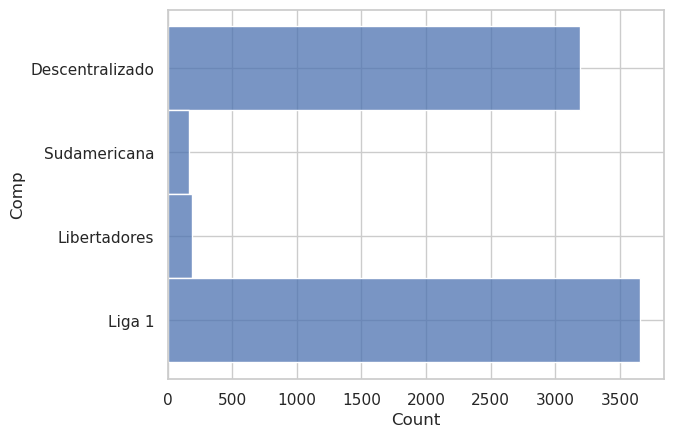

In [471]:
ax = sns.histplot(df, y='Comp');

Solo nos concentraremos en la liga local peruana. Por lo tanto, se ignorará los torneos como 'Sudamericana' y 'Libertadores'.

## Columna 'Round'

In [472]:
df['Round'].unique()

array(['Torneo Apertura', 'Torneo Clausura', 'Championship play-off',
       'First stage', 'Second stage', 'Round of 16', 'Quarter-finals',
       'Clausura play-off', 'Relegation play-off', 'Liguillas',
       'Semi-finals', 'Finals', 'Third-place play-off',
       'Torneo de Verano Regular Season', 'Group stage',
       'Torneo de Verano Finals', 'Second qualifying stage',
       'First qualifying stage', 'Third qualifying stage', 'Group Stage',
       'Final', 'Knockout round play-offs'], dtype=object)

In [473]:
df_local_comp = df[(df['Comp'] == 'Liga 1') | (df['Comp'] == 'Descentralizado')]

In [474]:
df_local_comp[df_local_comp['Round'] == 'Championship play-off']

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Match Report,Notes,Team
30,2014-12-13,NaN,Descentralizado,Championship play-off,Sat,Home,D,2,2,Sporting Cristal,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Juan Aurich
31,2014-12-16,NaN,Descentralizado,Championship play-off,Tue,Away,D,0,0,Sporting Cristal,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Juan Aurich
32,2014-12-20,NaN,Descentralizado,Championship play-off,Sat,Neutral,L,2,3,Sporting Cristal,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,Required Extra Time,Juan Aurich
423,2014-12-13,NaN,Descentralizado,Championship play-off,Sat,Away,D,2,2,Juan Aurich,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Sporting Cristal
424,2014-12-16,NaN,Descentralizado,Championship play-off,Tue,Home,D,0,0,Juan Aurich,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Sporting Cristal
425,2014-12-20,NaN,Descentralizado,Championship play-off,Sat,Neutral,W,3,2,Juan Aurich,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,Required Extra Time,Sporting Cristal


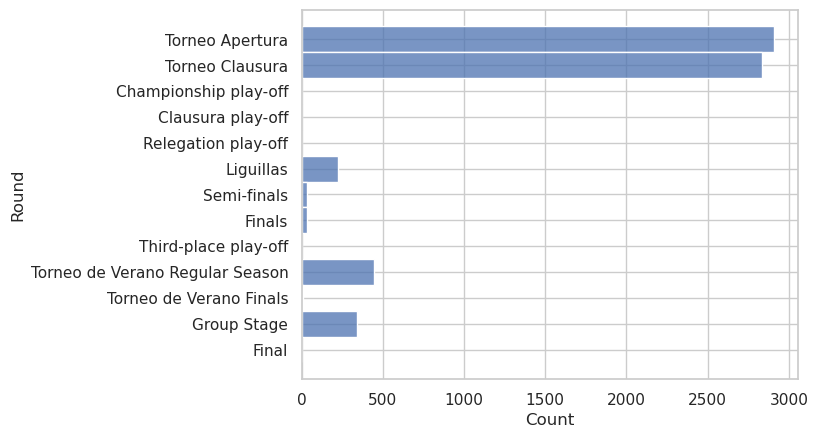

In [475]:
sns.histplot(df_local_comp, y='Round');

Debido a la gran cantidad de tipo de competencias, lo ideal sería agruparlas en un grupo más pequeño que represente la etapa en la que se encuentran:
- Regular Season: Torneo Apertura, Torneo Clausura, Liguillas, Torneo de Verano Regular Season, Group Stage
- Finals: Championship play-off, Clausura play-off, Relegation play-off, Semi-finals, Finals, Third-place play-off, Torneo de Verano Finals, Final

## Columna 'Day'

La columna debe ser reemplazada por la conversión a `datetimens` de las columnas `Date` y `Time`.

## Columna 'Venue'

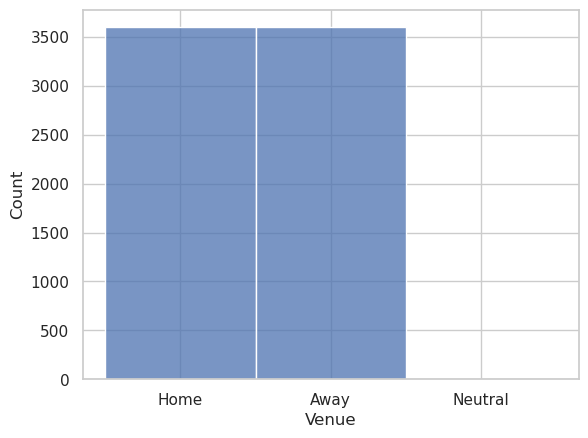

In [476]:
sns.histplot(df, x='Venue');

In [477]:
df[df['Venue'] == 'Neutral']

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Match Report,Notes,Team
32,2014-12-20,NaN,Descentralizado,Championship play-off,Sat,Neutral,L,2,3,Sporting Cristal,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,Required Extra Time,Juan Aurich
357,2014-12-03,NaN,Descentralizado,Clausura play-off,Wed,Neutral,L,0,1,Sporting Cristal,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Alianza Lima
422,2014-12-03,NaN,Descentralizado,Clausura play-off,Wed,Neutral,W,1,0,Alianza Lima,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Sporting Cristal
425,2014-12-20,NaN,Descentralizado,Championship play-off,Sat,Neutral,W,3,2,Juan Aurich,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,Required Extra Time,Sporting Cristal
456,2014-12-04,15:00,Descentralizado,Relegation play-off,Thu,Neutral,W,1,0,Los Caimanes,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,Required Extra Time,Sport Huancayo
517,2014-12-04,15:00,Descentralizado,Relegation play-off,Thu,Neutral,L,0,1,Sport Huancayo,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,Required Extra Time,Los Caimanes


Debido a que lo que queremos realizar con este dataset es un clasificador que determine si el equipo Local ganará el partido o no, no nos sirve los partidos en locaciones Neutrales, por lo tanto, los __eliminaremos__.

## Columna 'Result' 

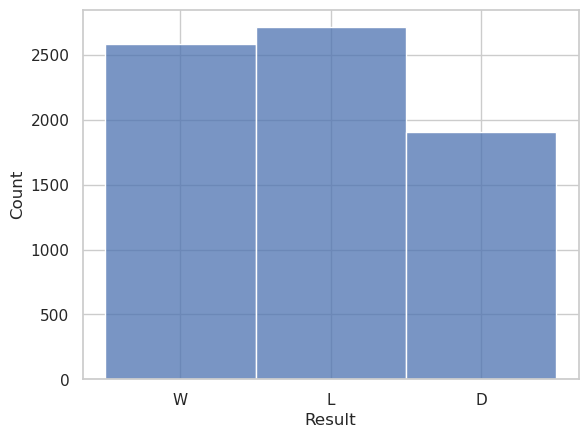

In [478]:
sns.histplot(df, x='Result');

En una etapa del proceso más avanzado, la columna deberá cambiar de valores para que sea un target binario.
- Result = 1: Equipo local gana
- Result = 0: Equipo local no gana

## Columna 'GF', 'GA'

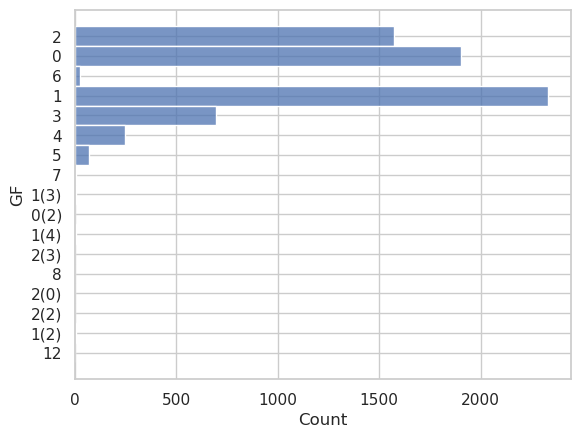

In [479]:
sns.histplot(df_local_comp, y='GF');

In [480]:
df[df['GF'] == '0(2)']

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Match Report,Notes,Team
722,2016-12-04,16:00,Descentralizado,Semi-finals,Sun,Away,L,0(2),1(3),Sporting Cristal,NaN,"19,604",NaN,NaN,NaN,Miguel Santiváñez,Match Report,Leg 2 of 2; Sporting Cristal won; Sporting Cri...,Deportivo Municipal


Después de analizar la fuente, los valores dentro de los paréntesis son goles realizados en la etapa de penales del partido.
Como no nos interesa el resultado de esa etapa, sino del partido de 90 minutos, ignoraremos los goles de penales.

## Columna 'Team' y 'Opponent'

In [481]:
opp = set(df_local_comp['Opponent'].unique().tolist())
tm = set(df_local_comp['Team'].unique().tolist())

In [482]:
tm - opp

{'Alianza Atletico',
 'Alianza Universidad',
 'Atletico Grau',
 'Carlos A Mannucci',
 'Defensor La Bocana',
 'Deportivo Municipal',
 'Leon de Huanuco',
 'San Simon',
 'Union Comercio',
 'Universidad Cesar Vallejo',
 'Universidad San Martin',
 'Universidad Tecnica de Cajamarca'}

In [483]:
opp - tm

{'Alianza Atlético',
 'Alianza Univ',
 'Atlético Grau',
 'Comerciantes',
 'Dep Municipal',
 'La Bocana',
 'León Huánuco',
 'Mannucci',
 'San Simón',
 'U César Vallejo',
 'USMP',
 'UTC',
 'Unión Comercio'}

In [484]:
len(opp), len(tm)

(36, 35)

In [485]:
opp

{'ADT Tarma',
 'Alianza Atlético',
 'Alianza Lima',
 'Alianza Univ',
 'Atlético Grau',
 'Ayacucho',
 'Binacional',
 'CDC Santa Rosa',
 'Cantolao',
 'Carlos Stein',
 'Cienciano',
 'Comerciantes',
 'Comerciantes Unidos',
 'Cusco',
 'Dep Municipal',
 'Deportivo Garcilaso',
 'Juan Aurich',
 'La Bocana',
 'León Huánuco',
 'Llacuabamba',
 'Los Caimanes',
 'Mannucci',
 'Melgar',
 'Pirata',
 'Real Garcilaso',
 'San Simón',
 'Sport Boys',
 'Sport Huancayo',
 'Sport Loreto',
 'Sport Rosario',
 'Sporting Cristal',
 'U César Vallejo',
 'USMP',
 'UTC',
 'Universitario',
 'Unión Comercio'}

Después de analizar los nombres, se concluye que se deben estandarizar los nombres para evitar problemas.

Además, dentro de la columna `Opponent` existe una duplicidad con el equipo _Comerciantes Unidos_, por lo que se debe también corregir ese caso.

## Columna 'Poss'

In [486]:
df_local_comp['Poss'].isnull().sum() / df_local_comp.shape[0]

np.float64(1.0)

Para el torneo local, esta columna tiene valores nulos. Por lo tanto, debe __eliminarse__.

## Columna 'Attendance'

In [487]:
df_local_comp['Attendance'].isnull().sum() / df_local_comp.shape[0]

np.float64(0.5261313868613139)

Para el torneo local, la columna tiene alrededor del 50% de nulos en los registros. Por lo tanto, debe __eliminarse__.

## Columna 'Captain'

In [488]:
df_local_comp['Captain'].isnull().sum() / df_local_comp.shape[0]

np.float64(0.23036496350364963)

In [489]:
df_local_comp['Captain'].unique().shape

(331,)

Para el torneo local, la columna tiene alrededor del 20% de nulos, por lo que no merece ser eliminada.
Sin embargo, los valores son nombres de jugadores, lo cual es un valor que a principio no es muy útil para la predicción.
Además, existen 331 valores únicos, lo que lo convierte en una columna difícil de trabajar.

## Columna 'Formation'

In [490]:
df_local_comp['Formation'].isnull().sum() / df_local_comp.shape[0]

np.float64(0.26496350364963506)

In [491]:
fm = df_local_comp['Formation'].unique()
fm

array([nan, '4-1-4-1', '3-5-2', '4-5-1', '4-3-3', '4-2-3-1', '3-4-1-2',
       '3-4-3', '4-1-3-2', '4-4-2', '4-4-1-1', '4-3-1-2', '5-4-1',
       '5-3-2', '4-2-2-2', '4-3-2-1', '3-2-4-1', '4-4-2◆', '3-1-4-2',
       '3-5-1-1', '3-3-3-1', '4-2-4'], dtype=object)

In [492]:
fm.shape

(22,)

La columna tiene cerca del 26% de valores como nulos, sin embargo, tiene 22 valores únicos, lo que lo hace complicado de trabajar.
Además, es una columna que en un primer momento no aporta demasiado valor a la predicción en base al conocimiento del dominio.

Por lo tanto, se __eliminará__.

## Columna 'Opp Formation'

In [493]:
df_local_comp['Opp Formation'].isnull().sum() / df_local_comp.shape[0]

np.float64(0.26496350364963506)

In [494]:
ofm = df_local_comp['Opp Formation'].unique()
ofm

array([nan, '4-3-1-2', '4-2-3-1', '5-3-2', '4-2-2-2', '4-3-3', '4-5-1',
       '4-1-4-1', '4-4-2', '4-4-1-1', '3-4-3', '3-4-1-2', '3-5-2',
       '5-4-1', '4-3-2-1', '3-2-4-1', '4-1-3-2', '3-1-4-2', '3-5-1-1',
       '3-3-3-1', '4-2-4'], dtype=object)

In [495]:
ofm.shape

(21,)

La columna tiene cerca del 26% de valores como nulos, sin embargo, tiene 22 valores únicos, lo que lo hace complicado de trabajar.
Además, es una columna que en un primer momento no aporta demasiado valor a la predicción en base al conocimiento del dominio.

Por lo tanto, se __eliminará__.

## Columna 'Referee'

Esta columna contiene los nombres de los árbitros de los partidos, lo que no ofrece demasiado valor para la predicción. Por lo tanto, se __eliminará__.

## Columna 'Match Report'

In [496]:
df_local_comp['Match Report'].unique()

array(['Match Report'], dtype=object)

Esta columna no aporta valor para la predicción. Se __eliminará__.

## Columna 'Notes'

In [497]:
df_local_comp['Notes'].info()

<class 'pandas.core.series.Series'>
Index: 6850 entries, 0 to 7205
Series name: Notes
Non-Null Count  Dtype 
--------------  ----- 
122 non-null    object
dtypes: object(1)
memory usage: 107.0+ KB


In [498]:
df_local_comp['Notes'].isnull().sum() / df_local_comp.shape[0]

np.float64(0.9821897810218978)

La columna será __eliminada__, pues no aporta valor a la predicción, además de que tiene cerca del 98% de valores nulos.

# Limpiando la data

## Manejando las fechas de los partidos

In [499]:
df_time_null = df[(df['Time'].isnull()) & (df['Venue'] != 'Neutral')]
df_time_null

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Match Report,Notes,Team
30,2014-12-13,NaN,Descentralizado,Championship play-off,Sat,Home,D,2,2,Sporting Cristal,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Juan Aurich
31,2014-12-16,NaN,Descentralizado,Championship play-off,Tue,Away,D,0,0,Sporting Cristal,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Juan Aurich
423,2014-12-13,NaN,Descentralizado,Championship play-off,Sat,Away,D,2,2,Juan Aurich,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Sporting Cristal
424,2014-12-16,NaN,Descentralizado,Championship play-off,Tue,Home,D,0,0,Juan Aurich,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Sporting Cristal


In [500]:
df_time_null.iloc[[0, 2], 1] = '15:45'
df_time_null.iloc[[1, 3], 1] = '20:00'
df.loc[df_time_null.index] = df_time_null

In [501]:
datetime = df['Date'] + ' ' + df['Time']
df['DateTime'] = pd.to_datetime(datetime, format='%Y-%m-%d %H:%M')

In [502]:
df['Day'] = df['DateTime'].dt.dayofweek

In [503]:
df.drop(['Date', 'Time'], axis=1, inplace=True)
df.head()

,Comp,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Match Report,Notes,Team,DateTime
0,Descentralizado,Torneo Apertura,5.0,Home,W,2,1,San Simón,NaN,"1,877",NaN,NaN,NaN,Fernando Legario,Match Report,NaN,Juan Aurich,2014-06-07 18:00:00
1,Descentralizado,Torneo Apertura,5.0,Away,L,0,2,U César Vallejo,NaN,"1,375",NaN,NaN,NaN,Luis Garay Evia,Match Report,NaN,Juan Aurich,2014-06-14 16:00:00
2,Descentralizado,Torneo Apertura,5.0,Home,W,2,1,León Huánuco,NaN,"1,683",NaN,NaN,NaN,Diego Haro,Match Report,NaN,Juan Aurich,2014-06-21 15:45:00
3,Descentralizado,Torneo Apertura,6.0,Away,D,0,0,Alianza Lima,NaN,"6,119",NaN,NaN,NaN,Luis Garay Evia,Match Report,NaN,Juan Aurich,2014-06-29 16:00:00
4,Descentralizado,Torneo Apertura,5.0,Home,W,6,0,Sport Huancayo,NaN,"1,366",NaN,NaN,NaN,Miguel Santiváñez,Match Report,NaN,Juan Aurich,2014-07-05 17:30:00


## Ajustando la compentencia

In [504]:
df['Comp'] = df['Comp'].replace({'Descentralizado': 'Liga 1'})
df = df[df['Comp'] == 'Liga 1']
df['Comp'].unique()

array(['Liga 1'], dtype=object)

In [505]:
df.shape

(6850, 18)

## Ajustando la columna Round

In [506]:
regular_season = ['Torneo Apertura', 'Torneo Clausura', 'Liguillas', 'Torneo de Verano Regular Season', 'Group Stage']
df['Round'] = df['Round'].replace(to_replace=regular_season, value='Regular Season')

In [507]:
finals = ['Championship play-off', 'Clausura play-off', 'Relegation play-off', 'Semi-finals', 'Finals', 'Third-place play-off', 'Torneo de Verano Finals', 'Final']
df['Round'] = df['Round'].replace(to_replace=finals, value='Finals')

In [508]:
df['Round'].unique()

array(['Regular Season', 'Finals'], dtype=object)

## Eliminamos partidos neutrales

In [509]:
df = df.drop(df[df['Venue'] == 'Neutral'].index).reset_index(drop=True)
df['Venue'].unique()

array(['Home', 'Away'], dtype=object)

In [510]:
df.shape

(6844, 18)

## Ajustamos los goles

In [511]:
# Se tratará como empate y se ignorará los goles de penales
def get_goals(row):
    row['GF'] = row['GF'].split('(')[0].strip()
    row['GA'] = row['GA'].split('(')[0].strip()
    return row
df = df.apply(get_goals, axis=1)
df['GF'] = df['GF'].astype(int)
df['GA'] = df['GA'].astype(int)

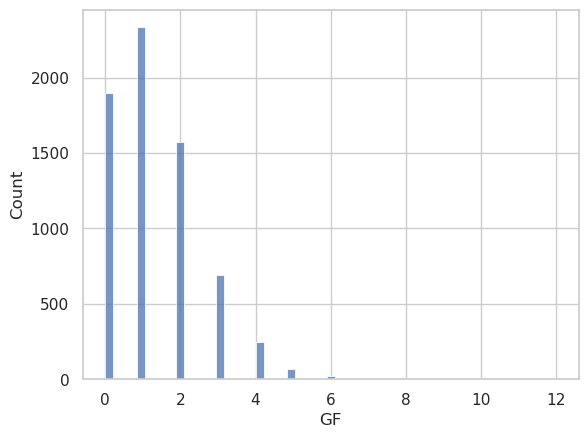

In [512]:
sns.histplot(df, x='GF');

In [513]:
df['GF'].describe()

count    6844.000000
mean        1.327148
std         1.196377
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        12.000000
Name: GF, dtype: float64

## Resolviendo inconsistencias en los nombres

In [514]:
team_dict = {
    'Alianza Atletico': 'Alianza Atlético',
    'Alianza Univ': 'Alianza Universidad',
    'Atletico Grau': 'Atlético Grau',
    'Mannucci': 'Carlos A Mannucci',
    'La Bocana': 'Defensor La Bocana',
    'Dep Municipal': 'Deportivo Municipal',
    'Leon de Huanuco': 'León Huánuco',
    'San Simon': 'San Simón',
    'U César Vallejo': 'Universidad César Vallejo',
    'Universidad Cesar Vallejo': 'Universidad César Vallejo',
    'Union Comercio':'Unión Comercio',
    'USMP': 'Universidad San Martin',
    'UTC':'Universidad Técnica de Cajamarca',
    'Universidad Tecnica de Cajamarca': 'Universidad Técnica de Cajamarca',
    'Comerciantes': 'Comerciantes Unidos',
}

In [515]:
df['Team'] = df['Team'].replace(team_dict)
df['Opponent'] = df['Opponent'].replace(team_dict)

In [516]:
opp = set(df['Opponent'].unique().tolist())
tm = set(df['Team'].unique().tolist())

In [517]:
tm - opp, opp - tm, len(tm), len(opp)

(set(), set(), 35, 35)

## Analizamos partidos duplicados
Debido a la naturaleza del dataset, el cual contiene todos los partidos por equipo, se tienen partidos duplicados.
Ejemplo:

- Universitario vs Alianza Lima: De este partido se tiene el registro de Univeristario en una fila y el de Alianza en otra.

Por lo tanto, debemos reducir el dataset para que exista un registro por partido con el equipo local y equipo visitante.

In [518]:
inv = {'M': 'M', 'W': 'L', 'L': 'W', 'D': 'D'}

In [519]:
def parse_matches(row) -> pd.Series:
    if row['Venue'] == 'Home':
        row['Home Team'] = row['Team']
        row['Away Team'] = row['Opponent']
    else:
        row['Home Team'] = row['Opponent']
        row['Away Team'] = row['Team']
        # Swap goals for away matches
        row['GF'], row['GA'] = row['GA'], row['GF']
        # Invert result for away matches
        row['Result'] = inv[row['Result']]

    return row

df = (df.apply(parse_matches, axis=1)  # type: ignore
      # Remove duplicate matches
      .drop_duplicates(subset=['DateTime', 'Home Team', 'Away Team'],
                       ignore_index=True)
      # Sort matches by date and time
      .sort_values(['DateTime'], axis=0, ignore_index=True)
     )

In [520]:
df.shape

(3422, 20)

## Dropeamos las columnas que no aportan valor

In [521]:
cols = ['Comp', 'Opponent', 'Team', 'Poss', 'Attendance', 'Captain', 'Formation', 'Opp Formation', 'Referee', 'Match Report', 'Notes']
df = df.drop(cols, axis=1)
df.shape

(3422, 9)

In [522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3422 entries, 0 to 3421
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Round      3422 non-null   object        
 1   Day        3422 non-null   float64       
 2   Venue      3422 non-null   object        
 3   Result     3422 non-null   object        
 4   GF         3422 non-null   int64         
 5   GA         3422 non-null   int64         
 6   DateTime   3422 non-null   datetime64[ns]
 7   Home Team  3422 non-null   object        
 8   Away Team  3422 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 240.7+ KB


# Añadiendo Features

## Cuántos goles marcados tiene el equipo local y visitante antes de cada partido?

In [523]:
def get_goals_scored_conceded(df: pd.DataFrame) -> pd.DataFrame:
    """Permite calcular los goles que cada equipo marcó y recibió antes de cada partido de temporada.

    Parámetros
    ----------
    df: DataFrame
        Dataframe del que se obtiene los datos
        
    Retorna
    -------
    DataFrame:
        DataFrame con nuevas columnas añadidas:
        'HTGS' (Home Team Goals Scored),
        'ATGS' (Away Teams Goals Scored), 
        'HTGC' (Home Team Goals Conceded) y 
        'ATGC' (Away Teams Goals Conceded).
    """
    # Columna útil para la agrupación por temporadas
    df['year'] = df['DateTime'].dt.year
    # DataFrame con los goles de los equipos locales en sus respectivos años
    df_home = df[['year', 'Home Team', 'GF', 'GA']].rename(columns={'year':'year','Home Team': 'Team', 'GF': 'Goals_scored', 'GA': 'Goals_Conceded'})
    df_home['Venue'] = 'Home'
    
    # DataFrame con los goles de los equipo visitantes en sus respectivos años
    df_away = df[['year', 'Away Team', 'GA', 'GF']].rename(columns={'year':'year','Away Team': 'Team', 'GA': 'Goals_scored', 'GF': 'Goals_Conceded'})
    df_away['Venue'] = 'Away'
    
    # Concatenamos para tenerlos todos en un solo DataFrame largo
    df_largo = pd.concat([df_home, df_away])
    # Ordenamos por índice para que los partidos estén ordenados
    df_largo = df_largo.sort_index()

    # Creamos el dataframe de goles acumulados
    df_largo['GS'] = (df_largo
                      # Agrupamos mediante el año y el equipo y obtenemos la columna 'Goals Scored'
                      .groupby(['year', 'Team'])['Goals_scored']
                      # Shifteamos en 1 periodo para que la suma acumulativa comience en 0
                     .shift(fill_value=0)
                      # Volvemos a agrupar debido a que pandas olvida que había agrupado despues de shiftear
                     .groupby([df_largo['year'], df_largo['Team']])
                      # Realizamos la suma acumulativa por grupo (año y equipo)
                     .cumsum());

    df_largo['GC'] = (df_largo
                      .groupby(['year', 'Team'])['Goals_Conceded']
                      .shift(fill_value=0)
                      .groupby([df_largo['year'], df_largo['Team']])
                      .cumsum());

    # Pivoteamos para que los valores de la columna Venue (Away y Home), sean las columnas
    # y que la data de cada fila sean los goles acumulados (GS)
    # El orden será en base al índice (partido)
    df_pivot_gs = df_largo.pivot(columns='Venue', values='GS')
    df_pivot_gc = df_largo.pivot(columns='Venue', values='GC')
    
    df_pivot_gs.columns = ['ATGS', 'HTGS']
    df_pivot_gc.columns = ['ATGC', 'HTGC']

    # Concatemamos (ordenando las columnas) y retornamos el nuevo DataFrame
    return (pd.concat([df, df_pivot_gs[['HTGS', 'ATGS']], df_pivot_gc[['HTGC', 'ATGC']]], axis=1)
           .drop('year', axis=1))

In [524]:
df = get_goals_scored_conceded(df)

Revisamos si la acumulación de goles está correcto verificando a solo un equipo.

In [525]:
team = 'Melgar'
df[(df['Home Team'] == team) | (df['Away Team'] == team)].head(10)

,Round,Day,Venue,Result,GF,GA,DateTime,Home Team,Away Team,HTGS,ATGS,HTGC,ATGC
3,Regular Season,5.0,Home,D,0,0,2014-06-07 20:10:00,Melgar,Cienciano,0,0,0,0
11,Regular Season,5.0,Away,L,1,2,2014-06-14 13:15:00,Sporting Cristal,Melgar,1,0,1,0
17,Regular Season,5.0,Home,W,3,0,2014-06-21 11:00:00,Melgar,Los Caimanes,2,0,1,4
28,Regular Season,6.0,Away,L,0,2,2014-06-29 11:00:00,Unión Comercio,Melgar,6,5,1,1
33,Regular Season,5.0,Home,D,2,2,2014-07-05 12:30:00,Melgar,Universidad Técnica de Cajamarca,7,2,1,5
41,Regular Season,4.0,Home,D,1,1,2014-07-11 19:30:00,Melgar,León Huánuco,9,8,3,9
53,Regular Season,2.0,Away,L,1,2,2014-07-16 20:00:00,Universitario,Melgar,10,10,5,4
63,Regular Season,0.0,Home,D,2,2,2014-07-21 15:30:00,Melgar,Ayacucho,12,11,5,8
65,Regular Season,4.0,Away,D,1,1,2014-07-25 11:00:00,Real Garcilaso,Melgar,8,14,9,7
77,Regular Season,3.0,Home,W,2,1,2014-07-31 13:15:00,Melgar,Universidad San Martin,15,14,8,8


## Cuál es la diferencia de goles que tiene el equipo local y visitante antes de cada partido?

In [526]:
# Home Team Goals Difference
df['HTGD'] = df['HTGS'] - df['HTGC']

# Away Team Goals Difference
df['ATGD'] = df['ATGS'] - df['ATGC']

In [527]:
team = 'Melgar'
df[(df['Home Team'] == team) | (df['Away Team'] == team)].head(10)

,Round,Day,Venue,Result,GF,GA,DateTime,Home Team,Away Team,HTGS,ATGS,HTGC,ATGC,HTGD,ATGD
3,Regular Season,5.0,Home,D,0,0,2014-06-07 20:10:00,Melgar,Cienciano,0,0,0,0,0,0
11,Regular Season,5.0,Away,L,1,2,2014-06-14 13:15:00,Sporting Cristal,Melgar,1,0,1,0,0,0
17,Regular Season,5.0,Home,W,3,0,2014-06-21 11:00:00,Melgar,Los Caimanes,2,0,1,4,1,-4
28,Regular Season,6.0,Away,L,0,2,2014-06-29 11:00:00,Unión Comercio,Melgar,6,5,1,1,5,4
33,Regular Season,5.0,Home,D,2,2,2014-07-05 12:30:00,Melgar,Universidad Técnica de Cajamarca,7,2,1,5,6,-3
41,Regular Season,4.0,Home,D,1,1,2014-07-11 19:30:00,Melgar,León Huánuco,9,8,3,9,6,-1
53,Regular Season,2.0,Away,L,1,2,2014-07-16 20:00:00,Universitario,Melgar,10,10,5,4,5,6
63,Regular Season,0.0,Home,D,2,2,2014-07-21 15:30:00,Melgar,Ayacucho,12,11,5,8,7,3
65,Regular Season,4.0,Away,D,1,1,2014-07-25 11:00:00,Real Garcilaso,Melgar,8,14,9,7,-1,7
77,Regular Season,3.0,Home,W,2,1,2014-07-31 13:15:00,Melgar,Universidad San Martin,15,14,8,8,7,6


## Cuál es el ratio de gol por partido que tiene el equipo local y visitante antes de cada partido?

In [528]:
def get_match_week(df: pd.DataFrame) -> pd.DataFrame:
    """Función que calcula la semana de partido de cada partido

    Parámetro
    ---------
    df: DataFrame con los datos a calcular

    Retorna
    -------
    DataFrame: Mismo DataFrame con la columna 'MW' (Match Week) añadida
    """
    df['year'] = df['DateTime'].dt.year
    df_home = df[['year', 'Home Team']].rename(columns={'year': 'year', 'Home Team': 'Team'})
    df_home['venue'] = 'Home'

    df_away = df[['year', 'Away Team']].rename(columns={'year': 'year', 'Away Team': 'Team'})
    df_away['venue'] = 'Away'

    df_largo = pd.concat([df_home, df_away])
    df_largo = df_largo.sort_index()
    
    # Numeramos cada aparición de cada grupo desde 1
    df_largo['MW'] = (df_largo.groupby(['year', 'Team'])
                      .cumcount() + 1
                     )
    # Obtenemos el match week del equipo local y visitante
    df_pivot = df_largo.pivot(columns='venue', values='MW')
    # Creamos la columna 'MW' con el valor más alto de cada fila
    # Porque la diferencia puede deberse al descanso de un equipo en una fecha
    # Pero la semana se jugó por lo que el retraso de partidos jugados no se debe contar
    df_pivot['MW'] = df_pivot[['Away', 'Home']].max(axis=1)

    return (pd.concat([df, df_pivot['MW']], axis=1)
            .drop('year', axis=1))

In [529]:
df = get_match_week(df)

In [530]:
# Rendimiento del equipo local y visitante con respectos a los goles marcados
df['HTGSForm'] = df['HTGS'] / (df['MW'] - 1)
df['ATGSForm'] = df['ATGS'] / (df['MW'] - 1)

df['HTGSForm'] = df['HTGSForm'].fillna(0)
df['ATGSForm'] = df['ATGSForm'].fillna(0)

# Rendimiento del equipo local y visitante con respecto a los goles recibidos
df['HTGCForm'] = df['HTGC'] / (df['MW'] - 1)
df['ATGCForm'] = df['ATGC'] / (df['MW'] - 1)

df['HTGCForm'] = df['HTGCForm'].fillna(0)
df['ATGCForm'] = df['ATGCForm'].fillna(0)

In [531]:
team = 'Universitario'
df[(df['DateTime'].dt.year == 2023) & ((df['Home Team'] == team) | (df['Away Team'] == team))].head()

,Round,Day,Venue,Result,GF,GA,DateTime,Home Team,Away Team,HTGS,ATGS,HTGC,ATGC,HTGD,ATGD,MW,HTGSForm,ATGSForm,HTGCForm,ATGCForm
2775,Regular Season,5.0,Away,W,4,0,2023-02-04 15:30:00,Universitario,Cantolao,0,0,0,0,0,0,1,0.000000,0.000000,0.000000,0.0
2786,Regular Season,6.0,Home,W,1,0,2023-02-12 13:30:00,Unión Comercio,Universitario,1,4,2,0,-1,4,2,1.000000,4.000000,2.000000,0.0
2795,Regular Season,6.0,Away,L,1,2,2023-02-19 15:30:00,Universitario,Alianza Lima,4,2,1,3,3,-1,3,2.000000,1.000000,0.500000,1.5
2803,Regular Season,6.0,Home,W,2,0,2023-02-26 19:00:00,Carlos A Mannucci,Universitario,5,5,1,3,4,2,4,1.666667,1.666667,0.333333,1.0
2810,Regular Season,6.0,Away,W,1,0,2023-03-05 15:30:00,Universitario,Melgar,5,0,5,6,0,-6,5,1.250000,0.000000,1.250000,1.5


# Modelando - Baseline

## Preprocesamiento

### Función de preprocesamiento

In [532]:
def get_preprocessing(df: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame):
    """Función que realiza el preprocesamiento necesario a la data para entrenar
    
    Parámetro
    =========
    df: DataFrame con la data para preprocesar

    Retorna
    =======
    X_train: DataFrame con el 80% de la data para realizar el entrenamiento
    X_valid: DataFrame con el 20% de la data para realizar la validación
    y_train: DataFrame con el 80% del target (Result)
    y_valid: DataFrame con el 20% del target (Result)
    """
    X = df.copy()
    y = X.pop('Result')
    
    def home_team_win(result):
        """Función que transforma el valor de 'Result' a binario.

        Retorna
        =======
        0: Si el equipo local no ganó
        1: Si el equipo local ganó
        """
        if result == 'W':
            result = 1
        else:
            result = 0
        return result

    y = y.apply(home_team_win)

    # Obtenemos las columnas numéricas y las object
    object_columns = [cols for cols in X.columns if X[cols].dtype == 'object']
    numeric_columns = [cols for cols in X.columns if X[cols].dtype != 'object']

    # Eliminamos las columnas categóricas que tengan más de 10 valores únicos
    drop_columns = [cols for cols in object_columns if X[cols].nunique() > 10]
    
    # Dropeamos columnas de ayuda y columnas categorícas con valore únicos altos (por ahora)
    X.drop(['DateTime',  'GF', 'GA'] + drop_columns, axis=1, inplace=True)

    # Dividimos el dataset en un set de entrenamiento y validación
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                            random_state=69)

    # Obtenemos nuevamente las columnas numéricas y categóricas después del dropeo
    object_columns = [cols for cols in X.columns if X[cols].dtype == 'object']
    numeric_columns = [cols for cols in X.columns if X[cols].dtype != 'object']

    # Escalamos las columnas numéricas
    scaler = StandardScaler().fit(X_train[numeric_columns])
    X_train_scaled = scaler.transform(X_train[numeric_columns])
    X_valid_scaled = scaler.transform(X_valid[numeric_columns])

    # Realizamos One Hot Encoding a las columnas categóricas
    dummies_train = pd.get_dummies(X_train[object_columns], dtype=float).reset_index(drop=True)
    dummies_valid = pd.get_dummies(X_valid[object_columns], dtype=float).reset_index(drop=True)

    # Concatenamos ambos DataFrames
    X_train_full = pd.concat([pd.DataFrame(X_train_scaled), dummies_train],
                             axis=1, ignore_index=True)
    X_valid_full = pd.concat([pd.DataFrame(X_valid_scaled), dummies_valid],
                             axis=1, ignore_index=True)

    # Volvemos a asignar los nombres de las columnas
    columns = numeric_columns + list(dummies_train.columns)
    
    X_train_full.columns = columns
    X_valid_full.columns = columns
    return X_train_full, X_valid_full, y_train, y_valid

## Entrenando

In [533]:
X_train, X_valid, y_train, y_valid = get_preprocessing(df)

In [534]:
X_train.head()

,Day,HTGS,ATGS,HTGC,ATGC,HTGD,ATGD,MW,HTGSForm,ATGSForm,HTGCForm,ATGCForm,Round_Finals,Round_Regular Season,Venue_Away,Venue_Home
0,-1.592890,2.401935,1.534329,1.020823,0.978309,2.045360,0.833692,1.164165,1.508361,0.569159,0.021531,0.006400,1.0,0.0,1.0,0.0
1,-0.060468,-0.404848,-0.654758,-0.716233,0.107292,0.438364,-1.095369,-0.443779,0.077881,-0.555942,-0.676047,1.305780,0.0,1.0,0.0,1.0
2,-0.060468,-1.137053,-0.776373,-0.964384,-0.825941,-0.275857,0.044531,-0.890430,-1.269930,0.170686,-0.529933,-0.009357,0.0,1.0,1.0,0.0
3,-0.571275,1.669731,2.020793,1.206937,1.476033,0.706196,0.833692,2.146798,-0.106528,0.136084,-0.484707,-0.265227,0.0,1.0,0.0,1.0
4,-1.082083,-0.892984,-1.202029,-0.840309,-1.261450,-0.097302,0.044531,-1.069091,0.457546,-1.201833,0.736391,-1.474796,0.0,1.0,0.0,1.0


### Función para obtener el Accuracy del modelo

In [535]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb

def get_scores(X_train, X_valid, y_train, y_valid, random_state=69) -> dict():
    """Función que obtiene el Accuracy para los modelos Logistic Regression,
    SVC, Decision Tree, RandomForest y XGBoost

    Parámetros
    ==========
    X_train: Set de datos para entrenar los modelos
    X_valid: Set de datos para validar los modelos
    y_train: Set de valores del target para entrenar
    y_valid: Set de valores del target para validar

    Retorna
    =======
    score: Diccionario con el Accuracy de cada modelo
    """
    classifiers = []

    classifiers.append(LogisticRegression(random_state=random_state,
                            solver='liblinear',
                            penalty='l2'))

    classifiers.append(SVC(kernel='linear',
                 random_state=random_state))

    classifiers.append(DecisionTreeClassifier(random_state=random_state,
                                             criterion='gini'))

    classifiers.append(RandomForestClassifier(n_estimators=50,
                                             random_state=random_state))

    classifiers.append(xgb.XGBClassifier(learning_rate=0.01,
                                         objective='binary:logistic',
                                         random_state=random_state))

    # Diccionario que tendrá {"Nombre del modelo": valor del Accuracy del modelo con el set de validación}
    scores = {clf.__class__.__name__: clf.fit(X_train, y_train).score(X_valid, y_valid) for clf in classifiers}

    return scores

In [536]:
scores_1 = get_scores(X_train, X_valid, y_train, y_valid)
scores_1

{'LogisticRegression': 0.621897810218978,
 'SVC': 0.6233576642335766,
 'DecisionTreeClassifier': 0.5197080291970803,
 'RandomForestClassifier': 0.5722627737226277,
 'XGBClassifier': 0.6131386861313869}

# Feature Engineering

## Añadiendo más features

### Con cuántos puntos llegan los equipos locales y visitante a cada partido?

In [537]:
df_2 = df.copy()

In [538]:
def which_points(row):
    """Función que permite calcular los puntos dependiendo de la localidad del equipo y el resultado del partido
    
       Parámetro 
       --------
       row: Fila con los datos para realizar el cálculo

       Retorna
       -------
       punto: 3 - Equipo gana, 1 - Equipo empata, 0 - Equipo pierde
    """
    result = row['Result']
    venue = row['venue']

    if result == 'D':
        return 1
    if venue == 'Home':
        if result == 'W':
            return 3
    else:
        if result == 'L':
            return 3
    
    return 0

In [539]:
def get_points(df: pd.DataFrame) -> pd.DataFrame:
    """Función que calcula los puntos con los que el equipo local y visitante
    llegan a cada partido.

    Parámetro
    ---------
    df: DataFrame con los datos para calcular los puntos

    Retorna
    -------
    df: DataFrame con las columnas HTP (Home Team Points) y ATP (Away Team Points)
    """
    df['year'] = df['DateTime'].dt.year

    df_home = df[['year', 'Home Team', 'Result']].rename(columns={'Home Team': 'Team'})
    df_home['venue'] = 'Home'

    df_away = df[['year', 'Away Team', 'Result']].rename(columns={'Away Team': 'Team'})
    df_away['venue'] = 'Away'

    df_large = pd.concat([df_home, df_away])
    df_large = df_large.sort_index()

    # Calculamos el punto de cada equipo que obtiene del partido
    df_large['Points'] = df_large.apply(which_points, axis=1)

    # Calculamos el acumulado con un periodo de retraso para que comiencen
    # todas las temporadas con 0
    df_large['AccPoints'] = (df_large
                             .groupby(['year', 'Team'])['Points']
                             .shift(fill_value=0)
                             .groupby([df_large['year'], df_large['Team']])
                             .cumsum()
                            )
    df_pivot = df_large.pivot(columns='venue', values='AccPoints')
    df_pivot.columns = ['ATP', 'HTP']
    return (pd.concat([df, df_pivot[['HTP', 'ATP']]], axis=1)
           .drop('year', axis=1))

In [540]:
df_2 = get_points(df_2)

### Cuál es la diferencia de puntos entre ambos equipos antes del partido

In [541]:
df_2['PD'] = df_2['HTP'] - df_2['ATP']

In [542]:
team = 'Alianza Lima'
df_2[(df_2['DateTime'].dt.year == 2023) & ((df_2['Home Team'] == team) | (df_2['Away Team'] == team))].head()

,Round,Day,Venue,Result,GF,GA,DateTime,Home Team,Away Team,HTGS,...,HTGD,ATGD,MW,HTGSForm,ATGSForm,HTGCForm,ATGCForm,HTP,ATP,PD
2777,Regular Season,6.0,Away,W,3,0,2023-02-05 10:00:00,Sporting Cristal,Alianza Lima,0,...,0,0,1,0.0,0.0,0.00,0.0,0,0,0
2788,Regular Season,6.0,Home,W,2,0,2023-02-12 16:00:00,Alianza Lima,Sport Boys,0,...,-3,1,2,0.0,2.0,3.00,1.0,0,3,-3
2795,Regular Season,6.0,Away,L,1,2,2023-02-19 15:30:00,Universitario,Alianza Lima,4,...,3,-1,3,2.0,1.0,0.50,1.5,3,3,0
2809,Regular Season,6.0,Away,L,0,1,2023-03-05 15:30:00,Universidad Técnica de Cajamarca,Alianza Lima,4,...,1,0,5,1.0,1.0,0.75,1.0,6,6,0
2814,Regular Season,5.0,Home,W,2,0,2023-03-11 20:00:00,Alianza Lima,Cusco,5,...,1,-2,6,1.0,1.4,0.80,1.8,9,9,0


### Cuál es la forma del equipo mediante el promedio de puntos obtenidos por partido

In [543]:
df_2['HTPForm'] = df_2['HTP'] / df_2['MW']
df_2['ATPForm'] = df_2['ATP'] / df_2['MW']
df_2['PDForm'] = df_2['HTPForm'] - df_2['ATPForm']

### Con cuántos partidos sin perder llegan los equipos locales y visitantes a cada partido?

In [544]:
def calculate_unbeaten_streaks(results):
    u_streak = 0
    unbeaten_list = []
    
    for res in results:
        unbeaten_list.append(u_streak)
        
        if res != 'L':
            u_streak += 1
        else:
            u_streak = 0
        
    return unbeaten_list

In [545]:
def calculate_losing_streaks(results):
    l_streak = 0
    losing_list = []
    
    for res in results:
        losing_list.append(l_streak)
        
        if res != 'L':
            l_streak = 0
        else:
            l_streak += 1
        
    return losing_list

In [546]:
def get_streaks(df: pd.DataFrame) -> pd.DataFrame:
    df_home = df[['Home Team', 'Result']].rename(columns={'Home Team': 'Team'})
    df_home['venue'] = 'home'

    df_away = df[['Away Team', 'Result']].rename(columns={'Away Team': 'Team'})
    df_away['venue'] = 'away'

    df_large = pd.concat([df_home, df_away])
    df_large = df_large.sort_index()

    inv = {'W': 'L', 'D': 'D', 'L': 'W'}

    df_large['Result Team'] = df_large.apply(lambda r: r['Result'] if r['venue'] == 'home' else inv[r['Result']], axis=1)
    
    df_large['US'] = (df_large
                           .groupby('Team')['Result Team']
                           .transform(lambda serie: calculate_unbeaten_streaks(serie))
                          )
    df_large['LS'] = (df_large
                           .groupby('Team')['Result Team']
                           .transform(lambda serie: calculate_losing_streaks(serie))
                          )

    df_pivot_us = df_large.pivot(columns='venue', values='US')
    df_pivot_us.columns = ['ATUS', 'HTUS']
    
    df_pivot_ls = df_large.pivot(columns='venue', values='LS')
    df_pivot_ls.columns = ['ATLS', 'HTLS']

    return (pd.concat([df, df_pivot_us[['HTUS', 'ATUS']], df_pivot_ls[['HTLS', 'ATLS']]], axis=1))

In [547]:
df_2 = get_streaks(df_2)

In [548]:
team = 'Universitario'
df_2[(df_2['DateTime'].dt.year == 2023) & ((df_2['Home Team'] == team) | (df_2['Away Team'] == team))].head()

,Round,Day,Venue,Result,GF,GA,DateTime,Home Team,Away Team,HTGS,...,HTP,ATP,PD,HTPForm,ATPForm,PDForm,HTUS,ATUS,HTLS,ATLS
2775,Regular Season,5.0,Away,W,4,0,2023-02-04 15:30:00,Universitario,Cantolao,0,...,0,0,0,0.00,0.00,0.0,12,1,0,0
2786,Regular Season,6.0,Home,W,1,0,2023-02-12 13:30:00,Unión Comercio,Universitario,1,...,0,3,-3,0.00,1.50,-1.5,0,13,6,0
2795,Regular Season,6.0,Away,L,1,2,2023-02-19 15:30:00,Universitario,Alianza Lima,4,...,3,3,0,1.00,1.00,0.0,0,1,1,0
2803,Regular Season,6.0,Home,W,2,0,2023-02-26 19:00:00,Carlos A Mannucci,Universitario,5,...,7,3,4,1.75,0.75,1.0,3,0,0,2
2810,Regular Season,6.0,Away,W,1,0,2023-03-05 15:30:00,Universitario,Melgar,5,...,3,0,3,0.60,0.00,0.6,0,0,3,4


### Cuáles son los resultados de los últimos 5 partidos de los equipos locales y visitantes antes de cada partido?

In [549]:
def get_5_last_games(df: pd.DataFrame):
    """Función que obtiene el resultado de los últimos 5 partidos de los equipos antes de cada partido

    Parámetro
    =========
    df: DataFrame con la data para el análisis

    Retorna
    =======
    df: DataFrame con las columnas LM_1, LM_2, ..., LM_5 que representan
        a los resultados de los últimos 5 partidos jugados.
    """
    df['year'] = df['DateTime'].dt.year

    df_home = df[['year', 'Home Team', 'Result']].rename(columns={'Home Team': 'Team'})
    df_home['Venue'] = 'home'

    df_away = df[['year', 'Away Team', 'Result']].rename(columns={'Away Team': 'Team'})
    df_away['Venue'] = 'away'

    df_large = pd.concat([df_home, df_away])
    df_large = df_large.sort_index()

    # Resultado invertido para el equipo visitante
    inv = {'W': 'L', 'D': 'D', 'L': 'W', 'M': 'M'}

    for i in range(1, 6):
        colname = 'LM_' + str(i)
        df_large[colname] = (df_large.groupby(['year', 'Team'])
                             # Corremos la data i periodos para tener los resultados de los i últimos partidos antes de cada partido
                            .shift(i, fill_value='M')
                             # En caso el equipo en cuestión sea visitante, se invierte el resultado
                            .apply(lambda row: row['Result'] if row['Venue'] == 'home' else inv[row['Result']], axis=1))

        df_pivot = df_large.pivot(columns='Venue', values=colname)
        df_pivot.columns = ['A' + colname, 'H' + colname]

        df = pd.concat([df, df_pivot[['H' + colname, 'A' + colname]]], axis=1)
    
    return df.drop('year', axis=1)

In [550]:
df_2 = get_5_last_games(df_2)

In [551]:
team = 'Universitario'
df_2[(df_2['DateTime'].dt.year == 2023) & ((df_2['Home Team'] == team) | (df_2['Away Team'] == team))].head()

,Round,Day,Venue,Result,GF,GA,DateTime,Home Team,Away Team,HTGS,...,HLM_1,ALM_1,HLM_2,ALM_2,HLM_3,ALM_3,HLM_4,ALM_4,HLM_5,ALM_5
2775,Regular Season,5.0,Away,W,4,0,2023-02-04 15:30:00,Universitario,Cantolao,0,...,M,M,M,M,M,M,M,M,M,M
2786,Regular Season,6.0,Home,W,1,0,2023-02-12 13:30:00,Unión Comercio,Universitario,1,...,L,W,M,M,M,M,M,M,M,M
2795,Regular Season,6.0,Away,L,1,2,2023-02-19 15:30:00,Universitario,Alianza Lima,4,...,L,W,W,L,M,M,M,M,M,M
2803,Regular Season,6.0,Home,W,2,0,2023-02-26 19:00:00,Carlos A Mannucci,Universitario,5,...,W,L,D,L,W,W,M,M,M,M
2810,Regular Season,6.0,Away,W,1,0,2023-03-05 15:30:00,Universitario,Melgar,5,...,L,L,L,L,L,L,W,M,M,M


## Selección de Features

In [552]:
X_train, X_valid, y_train, y_valid = get_preprocessing(df_2)

In [553]:
X_train.shape

(2737, 66)

### Métodos de Filtro

In [554]:
# Obtenemos las filas que son numéricas vs las codificadas
num_cols = X_train.columns[:-45]
obj_cols = X_train.columns[-45:]
num_cols, obj_cols

(Index(['Day', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTGD', 'ATGD', 'MW', 'HTGSForm',
        'ATGSForm', 'HTGCForm', 'ATGCForm', 'HTP', 'ATP', 'PD', 'HTPForm',
        'ATPForm', 'PDForm', 'HTUS', 'ATUS', 'HTLS'],
       dtype='object'),
 Index(['ATLS', 'Round_Finals', 'Round_Regular Season', 'Venue_Away',
        'Venue_Home', 'HLM_1_D', 'HLM_1_L', 'HLM_1_M', 'HLM_1_W', 'ALM_1_D',
        'ALM_1_L', 'ALM_1_M', 'ALM_1_W', 'HLM_2_D', 'HLM_2_L', 'HLM_2_M',
        'HLM_2_W', 'ALM_2_D', 'ALM_2_L', 'ALM_2_M', 'ALM_2_W', 'HLM_3_D',
        'HLM_3_L', 'HLM_3_M', 'HLM_3_W', 'ALM_3_D', 'ALM_3_L', 'ALM_3_M',
        'ALM_3_W', 'HLM_4_D', 'HLM_4_L', 'HLM_4_M', 'HLM_4_W', 'ALM_4_D',
        'ALM_4_L', 'ALM_4_M', 'ALM_4_W', 'HLM_5_D', 'HLM_5_L', 'HLM_5_M',
        'HLM_5_W', 'ALM_5_D', 'ALM_5_L', 'ALM_5_M', 'ALM_5_W'],
       dtype='object'))

In [555]:
# Máscara de features que son Discretos vs los Continuos
discrete_features = [not col.endswith('Form') for col in num_cols]
discrete_features

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True]

#### Varianza

In [556]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
selector.fit_transform(X_train[num_cols])
# Obtenemos los indices de los features elegidos por la Varianza
indices = selector.get_support(indices=True)

selected_columns = np.array([num_cols[i] for i in indices])

X_train = X_train[np.concatenate((selected_columns,obj_cols))]
X_valid = X_valid[np.concatenate((selected_columns,obj_cols))]

In [557]:
X_train.columns

Index(['Day', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTGD', 'ATGD', 'MW', 'HTGSForm',
       'ATGSForm', 'HTGCForm', 'ATGCForm', 'HTP', 'ATP', 'PD', 'HTPForm',
       'ATPForm', 'PDForm', 'HTUS', 'ATUS', 'HTLS', 'ATLS', 'Round_Finals',
       'Round_Regular Season', 'Venue_Away', 'Venue_Home', 'HLM_1_D',
       'HLM_1_L', 'HLM_1_M', 'HLM_1_W', 'ALM_1_D', 'ALM_1_L', 'ALM_1_M',
       'ALM_1_W', 'HLM_2_D', 'HLM_2_L', 'HLM_2_M', 'HLM_2_W', 'ALM_2_D',
       'ALM_2_L', 'ALM_2_M', 'ALM_2_W', 'HLM_3_D', 'HLM_3_L', 'HLM_3_M',
       'HLM_3_W', 'ALM_3_D', 'ALM_3_L', 'ALM_3_M', 'ALM_3_W', 'HLM_4_D',
       'HLM_4_L', 'HLM_4_M', 'HLM_4_W', 'ALM_4_D', 'ALM_4_L', 'ALM_4_M',
       'ALM_4_W', 'HLM_5_D', 'HLM_5_L', 'HLM_5_M', 'HLM_5_W', 'ALM_5_D',
       'ALM_5_L', 'ALM_5_M', 'ALM_5_W'],
      dtype='object')

#### Correlation

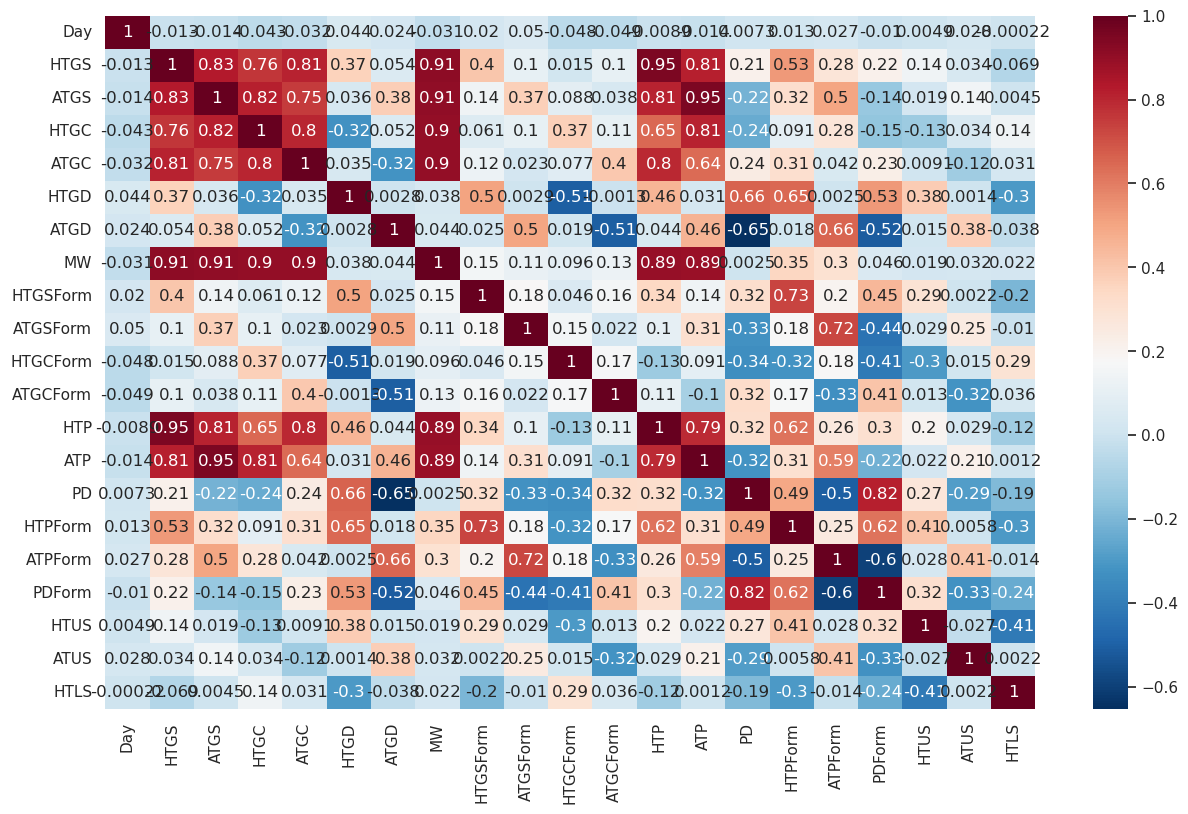

In [558]:
plt.figure(figsize=(15, 9))
corr_matrix = X_train[num_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
plt.show();

In [559]:
# Recorremos la mtraix en búsqueda de coeficientes mayores a 0.7
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j], sep=' - ')

ATGS - HTGS - 0.8297046755971432
HTGC - HTGS - 0.7626766129721096
HTGC - ATGS - 0.8185555336440145
ATGC - HTGS - 0.8109279527546955
ATGC - ATGS - 0.7542349814739482
ATGC - HTGC - 0.8002785357522364
MW - HTGS - 0.9106452794693498
MW - ATGS - 0.908185258104643
MW - HTGC - 0.8997045286978193
MW - ATGC - 0.8980089358178774
HTP - HTGS - 0.9511744366068884
HTP - ATGS - 0.8123520638444292
HTP - ATGC - 0.7997565617777608
HTP - MW - 0.8915183363735576
ATP - HTGS - 0.8145892514543704
ATP - ATGS - 0.9518854587019189
ATP - HTGC - 0.8064699857717917
ATP - MW - 0.8901419796669587
ATP - HTP - 0.7931592332389465
HTPForm - HTGSForm - 0.7294013719479612
ATPForm - ATGSForm - 0.7225369474966914
PDForm - PD - 0.8153774399188162


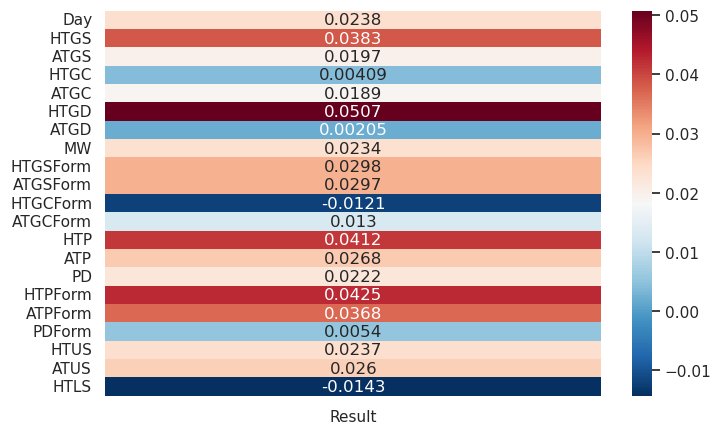

In [560]:
plt.figure(figsize=(8,5))
X_y = X_train[num_cols].copy()
X_y['Result'] = y_train

corr_matrix = X_y.corr()[['Result']].drop(labels=['Result'])

sns.heatmap(corr_matrix, annot=True, fmt='.3', cmap='RdBu_r')
plt.show()

In [561]:
for i in corr_matrix.index:
    if abs(corr_matrix.loc[i, 'Result']) < 0.002:
        print(i, corr_matrix.loc[i, 'Result'])

#### Mutual Information

In [562]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    """Función que calcula el mi score de los features numéricos
    """
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=68)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_train[num_cols], y_train, discrete_features)

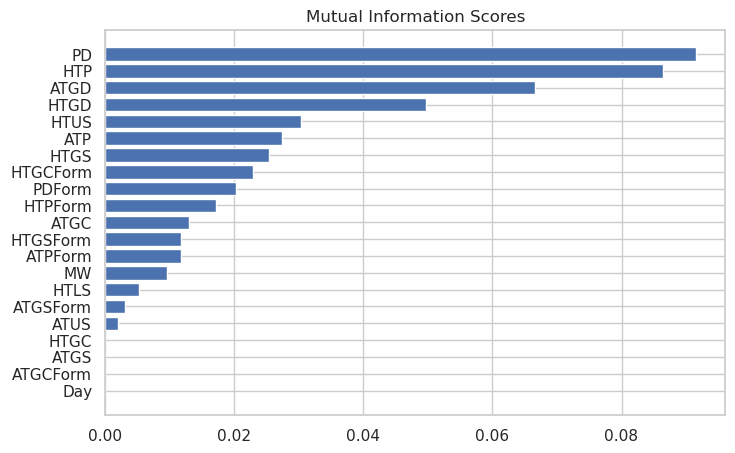

In [563]:
def plot_mi_scores(scores):
    """Función que grafica el score obtenido del MI
    """
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [564]:
from sklearn.feature_selection import SelectKBest
from functools import partial

# Elección de los k mejores features en base al MI score
score_func = partial(mutual_info_regression, discrete_features=discrete_features,
                     random_state=68)

selection = SelectKBest(score_func=score_func, k=3)

selection.fit_transform(X_train[num_cols], y_train)

select_columns = list(X_train.columns[selection.get_support(indices=True)])
select_columns

['ATGD', 'HTP', 'PD']

## Entrenamiento

In [565]:
X_train.head()

,Day,HTGS,ATGS,HTGC,ATGC,HTGD,ATGD,MW,HTGSForm,ATGSForm,...,ALM_4_M,ALM_4_W,HLM_5_D,HLM_5_L,HLM_5_M,HLM_5_W,ALM_5_D,ALM_5_L,ALM_5_M,ALM_5_W
0,-1.592890,2.401935,1.534329,1.020823,0.978309,2.045360,0.833692,1.164165,1.508361,0.569159,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.060468,-0.404848,-0.654758,-0.716233,0.107292,0.438364,-1.095369,-0.443779,0.077881,-0.555942,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.060468,-1.137053,-0.776373,-0.964384,-0.825941,-0.275857,0.044531,-0.890430,-1.269930,0.170686,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.571275,1.669731,2.020793,1.206937,1.476033,0.706196,0.833692,2.146798,-0.106528,0.136084,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-1.082083,-0.892984,-1.202029,-0.840309,-1.261450,-0.097302,0.044531,-1.069091,0.457546,-1.201833,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Elección de features 

In [566]:
scores = get_scores(X_train, X_valid, y_train, y_valid)
scores

{'LogisticRegression': 0.602919708029197,
 'SVC': 0.6233576642335766,
 'DecisionTreeClassifier': 0.564963503649635,
 'RandomForestClassifier': 0.5620437956204379,
 'XGBClassifier': 0.6102189781021898}

In [567]:
X_train_2 = X_train[select_columns + obj_cols.to_list()]
X_valid_2 = X_valid[select_columns + obj_cols.to_list()]
scores_2 = get_scores(X_train_2, X_valid_2, y_train, y_valid)
scores_2

{'LogisticRegression': 0.6102189781021898,
 'SVC': 0.6233576642335766,
 'DecisionTreeClassifier': 0.4992700729927007,
 'RandomForestClassifier': 0.564963503649635,
 'XGBClassifier': 0.6233576642335766}

In [568]:
X_train_3 = X_train[select_columns + obj_cols.to_list() + ['HTP', 'ATP']]
X_valid_3 = X_valid[select_columns + obj_cols.to_list() + ['HTP', 'ATP']]
scores_3 = get_scores(X_train_3, X_valid_3, y_train, y_valid)
scores_3

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [ ]:
X_train_4 = X_train[select_columns + ['HTP', 'ATP']]
X_valid_4 = X_valid[select_columns + ['HTP', 'ATP']]
scores_4 = get_scores(X_train_4, X_valid_4, y_train, y_valid)
scores_4

In [ ]:
form_columns = [cols for cols in num_cols if cols.endswith('Form')]
X_train_5 = X_train[form_columns + obj_cols.to_list()]
X_valid_5 = X_valid[form_columns + obj_cols.to_list()]
scores_5 = get_scores(X_train_5, X_valid_5, y_train, y_valid)
scores_5

## Resultados

In [ ]:
title_list = ['Baseline', 'All features', 'Selected and Encoded Features', "Selected, Encoded and 'HTP', 'ATP' Features",
             "Selected and 'HTP', 'ATP' Features", 'Only Form and Encoded Features']

In [ ]:
scores_list = [scores_1, scores, scores_2, scores_3, scores_4, scores_5]

fig, axs = plt.subplots(3, 3, figsize=(20, 10), constrained_layout=True)

# Eliminar axis innecesario
axs = axs.flat
for ax in axs[len(scores_list):]:
    ax.remove()
    
axs = axs[:len(scores_list)]

fig.suptitle('Accuracy for each set of Features and Models', fontsize=20)

# Graficar cada score
for i, score in enumerate(scores_list):
    ax = axs[i]
    x = np.arange(len(score))
    sns.barplot(x=score.keys(), y=score.values(), ax=ax)

    # Ponemos el valor encima de cada barra
    ax.bar_label(ax.containers[0], fontsize=10);
    # Seteamos el valor de los ticks
    ax.set_xticks(np.arange(len(score.keys())))
    # Seteamos el valor de las etiquetas de los ticks con abreviaciones
    ax.set_xticklabels(['LR', 'SVC', 'DT', 'RF', 'XGB'])
    # Seteamos el limite superior del eje y 
    ax.set_ylim(top=0.7)
    # Seteamos el título de cada figura
    ax.set_title(title_list[i])